In [13]:
import jax
import jax.numpy as jnp
import jax.random as jr
import matplotlib.pyplot as plt
import numpy as np
import scienceplots  # noqa
from hypermagnetics.sources import configure
from matplotlib import patches

plt.style.use(["science", "ieee"])

In [17]:
res = 64
lim = 3

config = {
    "n_samples": 1,
    "n_sources": 1,
    "seed": 43,
    "lim": lim,
    "res": res,
}
train_data = configure(**config)
m = train_data["sources"][0][0][:2]
r0 = train_data["sources"][0][0][2:]
r, potential, field = (
    train_data["grid"],
    train_data["potential_grid"],
    train_data["field_grid"],
)

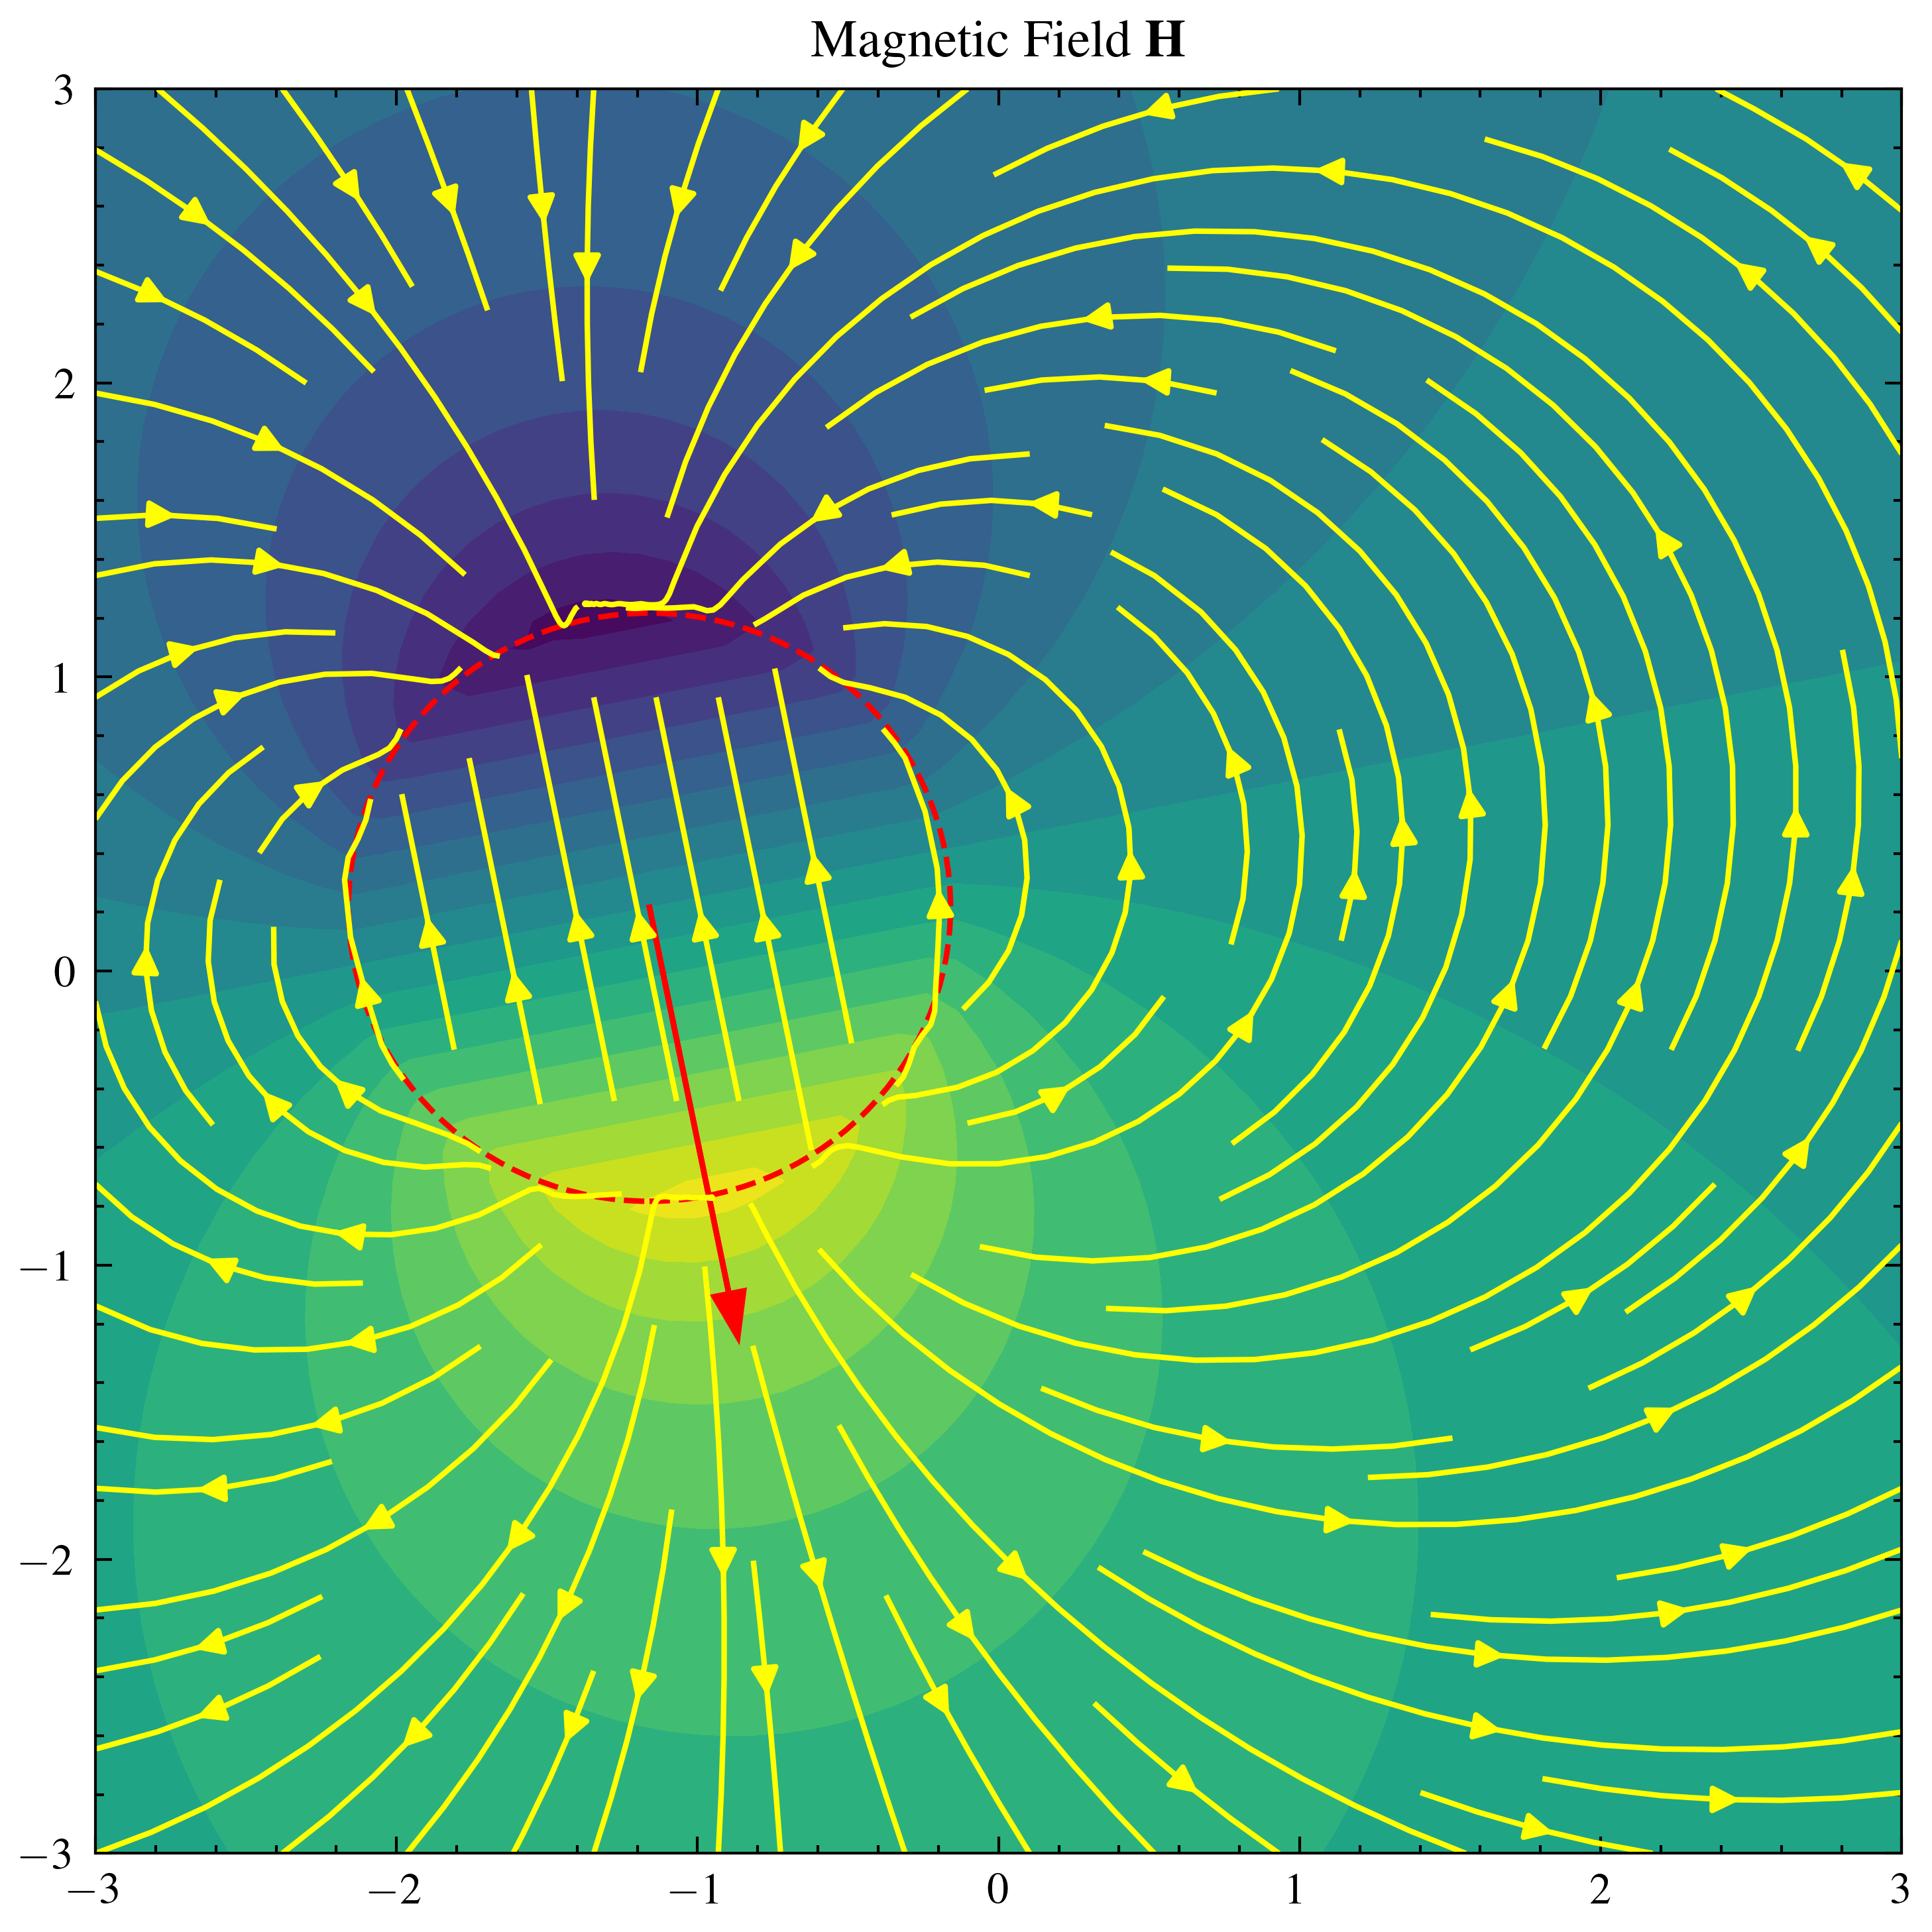

In [37]:
row = jnp.linspace(-lim, lim, res)

x, y = jnp.meshgrid(row, row)
r = jnp.stack([x, y], axis=-1).reshape(-1, 2)

potential = potential.reshape(res, res)
field = field.reshape(res, res, 2)

with plt.style.context("science"):
    fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))

    # Subplot 1: Contour plot of potential
    ax1.contourf(x, y, potential, levels=20, cmap="viridis")
    ax1.set_title("Magnetic Scalar Potential")

    # Draw red square
    square = patches.Circle(
        (float(r0[0]), float(r0[1])),
        1,
        linewidth=1,
        edgecolor="r",
        facecolor="none",
        linestyle="--",
    )
    ax1.add_patch(square)
    ax1.arrow(
        float(r0[0]),
        float(r0[1]),
        m[0],
        m[1],
        head_width=0.10,
        head_length=0.15,
        fc="r",
        ec="r",
    )

    # Subplot 2: Streamplot of field
    nx = np.array(x)
    ny = np.array(y)
    Bx = np.array(field[..., 0])
    By = np.array(field[..., 1])
    ax1.streamplot(nx, ny, Bx, By, color="yellow", density=1)
    ax1.set_title("Magnetic Field $\mathbf{H}$")

    plt.tight_layout()
    plt.show()

In [ ]:
x = r[:, 0].reshape((config["res"], config["res"], config["res"]))
y = r[:, 1].reshape((config["res"], config["res"], config["res"]))
z = r[:, 2].reshape((config["res"], config["res"], config["res"]))

Bx = field[0][:, 0].reshape((config["res"], config["res"], config["res"]))
By = field[0][:, 1].reshape((config["res"], config["res"], config["res"]))
Bz = field[0][:, 2].reshape((config["res"], config["res"], config["res"]))